In [0]:
import pandas as pd
import io
df = pd.read_csv('csv_result-Phishing_features.csv')

In [0]:
df.head()

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [0]:
y = df['Result']

In [0]:
y=y.replace(-1,0)
y

0        0
1        0
2        0
3        0
4        1
5        1
6        0
7        0
8        1
9        0
10       1
11       0
12       0
13       0
14       1
15       0
16       0
17       0
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       0
27       1
28       1
29       1
        ..
11025    1
11026    1
11027    1
11028    1
11029    0
11030    0
11031    1
11032    0
11033    1
11034    0
11035    1
11036    1
11037    0
11038    0
11039    0
11040    0
11041    1
11042    1
11043    0
11044    1
11045    1
11046    1
11047    0
11048    1
11049    0
11050    1
11051    0
11052    0
11053    0
11054    0
Name: Result, Length: 11055, dtype: int64

In [0]:
X = df.iloc[:,1:31]

In [0]:
X.head()  

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train,X_test = X_train.values,X_test.values
y_train,y_test = y_train.values,y_test.values
import numpy as np
def normalize_with_moments(x, axes=[0, 1], epsilon=1e-8):
    mean = np.mean(x)
    variance = np.var(x)
    x_normed = (x - mean) // np.sqrt(variance + epsilon) # epsilon to avoid dividing by zero
    return x_normed
X_train = normalize_with_moments(X_train)
X_test = normalize_with_moments(X_test)

In [0]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)
model.evaluate(X_test, y_test)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
7406/7406 [==============================] - 3s 395us/sample - loss: 0.2089 - acc: 0.9168
Epoch 2/5
7406/7406 [==============================] - 2s 331us/sample - loss: 0.1423 - acc: 0.9430
Epoch 3/5
7406/7406 [==============================] - 2s 325us/sample - loss: 0.1236 - acc: 0.9491
Epoch 4/5
7406/7406 [==============================] - 2s 328us/sample - loss: 0.1095 - acc: 0.9537
Epoch 5/5
3649/3649 [==============================] - 0s 85us/sample - loss: 0.1169 - acc: 0.9523


[0.11692333573035979, 0.9523157]

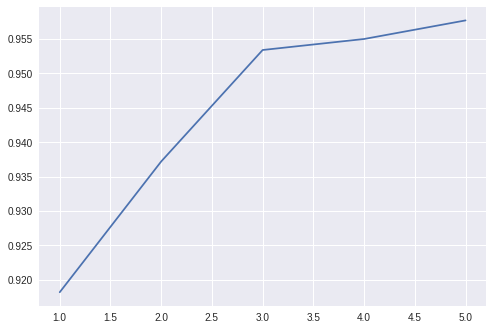

In [0]:
l=[0.9182,0.9372,0.9534,0.9550,0.9577]
l1 = [1,2,3,4,5]
import matplotlib.pyplot as plt
plt.plot(l1,l)

In [0]:
import tensorflow as tf

model1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(1024, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model1.fit(X_train, y_train, epochs=5)
model1.evaluate(X_test, y_test)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/5
7406/7406 [==============================] - 4s 525us/sample - loss: 0.2088 - acc: 0.9121
Epoch 2/5
7406/7406 [==============================] - 4s 489us/sample - loss: 0.1443 - acc: 0.9427
Epoch 3/5
7406/7406 [==============================] - 3s 468us/sample - loss: 0.1246 - acc: 0.9490
Epoch 4/5
7406/7406 [==============================] - 3s 454us/sample - loss: 0.1022 - acc: 0.9564
Epoch 5/5
3649/3649 [==============================] - 0s 99us/sample - loss: 0.1326 - acc: 0.9477


[0.13255681482185303, 0.94765687]

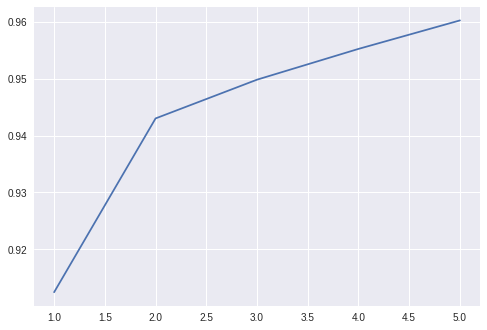

In [0]:
l=[0.9125,0.9430,0.9498,0.9552,0.9602]
l1 = [1,2,3,4,5]
import matplotlib.pyplot as plt
plt.plot(l1,l)

In [0]:
pred = model.predict(X_test)

In [0]:
round(pred[7][0])

0.0

In [0]:
import tensorflow as tf

model1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(1024, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2, activation=tf.nn.sigmoid)
])
model1.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1.fit(X_train, y_train, epochs=5)
model1.evaluate(X_test, y_test)

Epoch 1/5
7406/7406 [==============================] - 3s 365us/sample - loss: 0.5763 - acc: 0.8099
Epoch 2/5
7406/7406 [==============================] - 3s 343us/sample - loss: 0.2914 - acc: 0.9045
Epoch 3/5
7406/7406 [==============================] - 3s 345us/sample - loss: 0.2275 - acc: 0.9193
Epoch 4/5
7406/7406 [==============================] - 3s 345us/sample - loss: 0.1983 - acc: 0.9259
Epoch 5/5
3649/3649 [==============================] - 0s 116us/sample - loss: 0.1871 - acc: 0.9260


[0.1870557349425337, 0.92600715]

In [0]:
pred = model.predict(X_test)

In [0]:
round(pred[0][0])


0.0

In [0]:
y_test[0]

0

In [0]:
round(pred[9][0])

1.0

In [0]:
print(y_test[9])
pred = model.predict(X_test)

0


In [0]:
y_test[20]

0

In [0]:
round(pred[20][0])

0.0

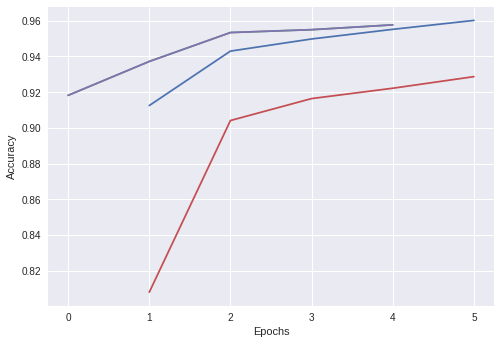

In [0]:
l=[0.9182,0.9372,0.9534,0.9550,0.9577]
l3=[0.8079,0.9041,0.9164,0.9222,0.9287]
l2=[0.9125,0.9430,0.9498,0.9552,0.9602]
l1 = [1,2,3,4,5]
import matplotlib.pyplot as plt
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(l1,l2,l)
plt.plot(l1,l3,l)

In [0]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)
model.evaluate(X_test, y_test)

Epoch 1/5
7406/7406 [==============================] - 2s 279us/sample - loss: 0.2411 - acc: 0.9013
Epoch 2/5
7406/7406 [==============================] - 2s 256us/sample - loss: 0.1591 - acc: 0.9357
Epoch 3/5
7406/7406 [==============================] - 2s 259us/sample - loss: 0.1317 - acc: 0.9483
Epoch 4/5
7406/7406 [==============================] - 2s 255us/sample - loss: 0.1205 - acc: 0.9522
Epoch 5/5
3649/3649 [==============================] - 0s 85us/sample - loss: 0.1163 - acc: 0.9545


[0.11630499277393536, 0.95450807]

In [0]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)
model.evaluate(X_test, y_test)

Epoch 1/5
7406/7406 [==============================] - 2s 217us/sample - loss: 0.5134 - acc: 0.8343
Epoch 2/5
7406/7406 [==============================] - 1s 193us/sample - loss: 0.2809 - acc: 0.9093
Epoch 3/5
7406/7406 [==============================] - 1s 193us/sample - loss: 0.2278 - acc: 0.9178
Epoch 4/5
7406/7406 [==============================] - 2s 206us/sample - loss: 0.2028 - acc: 0.9224
Epoch 5/5
3649/3649 [==============================] - 0s 86us/sample - loss: 0.1878 - acc: 0.9249


[0.18777581128103174, 0.92491096]

Text(0, 0.5, 'Train Accuracy')

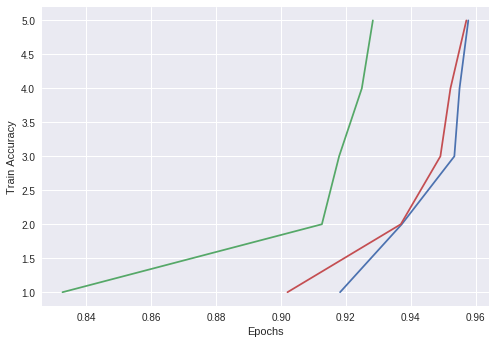

In [0]:
adam=[0.9182,0.9372,0.9534,0.9550,0.9577]
rms = [0.9020,0.9369,0.9491,0.9522,0.9571]
sgd = [0.8327,0.9126,0.9179,0.9249,0.9283]
l = [1,2,3,4,5]
plt.plot(adam,l)
plt.plot(sgd,l)
plt.plot(rms,l)
plt.xlabel("Epochs")
plt.ylabel("Train Accuracy")

In [0]:
import tensorflow as tf

model1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(1024, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model1.fit(X_train, y_train, epochs=5)
model1.evaluate(X_test, y_test)

Epoch 1/5
7406/7406 [==============================] - 5s 619us/sample - loss: 0.2107 - acc: 0.9132
Epoch 2/5
7406/7406 [==============================] - 5s 610us/sample - loss: 0.1383 - acc: 0.9415
Epoch 3/5
7406/7406 [==============================] - 4s 596us/sample - loss: 0.1177 - acc: 0.9544
Epoch 4/5
7406/7406 [==============================] - 4s 571us/sample - loss: 0.1001 - acc: 0.9606
Epoch 5/5
3649/3649 [==============================] - 1s 158us/sample - loss: 0.1247 - acc: 0.9540


[0.12468271436479589, 0.95396]

Text(0.5, 0, 'Train Accuracy')

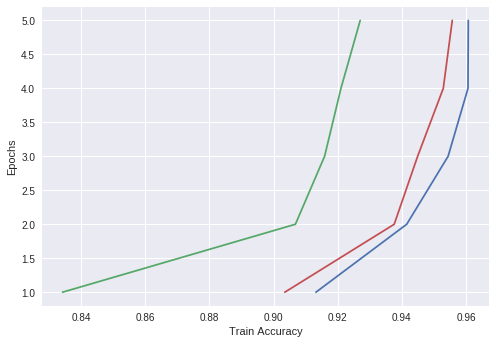

In [0]:
adam=[0.9132, 0.9415,0.9544,0.9606,0.9607]
rms = [0.9035,0.9376,0.9449,0.9529,0.9557]
sgd = [0.8342,0.9068,0.9159,0.9210,0.9270]
l = [1,2,3,4,5]
plt.plot(adam,l)
plt.plot(sgd,l)
plt.plot(rms,l)
plt.ylabel("Epochs")
plt.xlabel("Train Accuracy")